In [498]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import h5py
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol
from rdkit.Chem import rdGeometry

def load_molecule_hdf5(filename, idx):
    """Load single molecule from HDF5 file"""
    with h5py.File(filename, 'r') as f:
        # Get coordinates and reshape
        coords_flat = f['coords'][idx]
        coords = coords_flat.reshape(-1, 3)
        
        # Get atom types (decode bytes to string)
        atom_types_str = f['atom_types'][idx]
        if isinstance(atom_types_str, bytes):
            atom_types_str = atom_types_str.decode('utf-8')
        atom_types = atom_types_str.split('|')
        
        # Get strings (decode bytes to string if necessary)
        smiles = f['smiles'][idx]
        if isinstance(smiles, bytes):
            smiles = smiles.decode('utf-8')
            
        selfies = f['selfies'][idx]
        if isinstance(selfies, bytes):
            selfies = selfies.decode('utf-8')
        
        return {
            'atom_types': atom_types,
            'coords': coords,
            'smiles': smiles,
            'selfies': selfies
        }

def find_indices(lst, target):
    return [i for i, val in enumerate(lst) if val == target]

    sofi_pgs.pop(idx)
    sofi_static_pgs.pop(idx)

In [1129]:
mil = 4
sym_thr = "adaptive"
with open(f"mol3d_data/point_groups_million_{mil}_sym_thr_{sym_thr}_sofi.json", "r") as f:
    sofi_pgs = json.load(f)
# with open(f"mol3d_data/point_groups_million_{mil}_pymsym.json", "r") as f:
#     pymsym_pgs = json.load(f)
with open(f"mol3d_data/point_groups_million_{mil}_sym_thr_0.4_sofi.json", "r") as f:
    sofi_static_pgs = json.load(f)
n_samples = len(sofi_pgs)

In [1130]:
with open(f"mol3d_data/failed_ids_million_{mil}_sym_thr_{sym_thr}_sofi.json", "r") as f:
    failed_ids = json.load(f)

In [1120]:
with open(f"mol3d_data/failed_ids_million_{mil}_sym_thr_0.4_sofi.json", "w") as f:
    json.dump(sofi_static_pgs, f)

In [1131]:
diff_indices = [i for i, (x,y) in enumerate(zip(sofi_pgs,sofi_static_pgs)) if x != y]

In [1232]:
particular_molecules = find_indices(sofi_pgs, "C1") # C∞v D∞h
n=0

In [1236]:
print(f"errors occured during SOFI adaptive pg analysis for molecules with ids {failed_ids}")
print(f"sofi with sym_thr = 0.4 computed {[sofi_static_pgs[fi] for fi in failed_ids]} point groups for them\n")

print(f"out of {n_samples} molecules the computed point groups do not match for {len(diff_indices)} molecules\ne. g.")
#m_id = diff_indices[n]
#m_id = failed_ids[n]
m_id = unique_indexes[n]
#m_id = particular_molecules[n]
#m_id = 16672
print(f"molecule with id {m_id} has {sofi_static_pgs[m_id]} according to SOFI with sym_thr = 0.4 and {sofi_pgs[m_id]} according to SOFI with adaptive sym_thr")
mol = load_molecule_hdf5(f"mol3d_data/molecules3d_million_{mil}.h5", m_id)
print(mol["atom_types"])
#print(mol["coords"])

# Your molecule data
atoms = mol["atom_types"]
coords = np.array(mol["coords"], dtype=float)

# Create editable molecule and add atoms
molecule = Chem.RWMol()
for atom in atoms:
    molecule.AddAtom(Chem.Atom(atom))

# Add 3D conformer
conf = Chem.Conformer(len(atoms))
for i, (x, y, z) in enumerate(coords):
    conf.SetAtomPosition(i, rdGeometry.Point3D(float(x), float(y), float(z)))
molecule.AddConformer(conf)

# Generate MOL block using RDKit’s built-in method to ensure proper 3D representation
mol_block = Chem.MolToMolBlock(molecule)

# Visualize interactively
view = py3Dmol.view(width=600, height=600)
view.addModel(mol_block, 'mol')
view.setStyle({'stick':{}})
view.setStyle({'sphere':{'radius':0.3}})
view.zoomTo()
view.show()
n += 1

errors occured during SOFI adaptive pg analysis for molecules with ids [717065, 740730]
sofi with sym_thr = 0.4 computed ['failed', 'failed'] point groups for them

out of 899644 molecules the computed point groups do not match for 5046 molecules
e. g.


IndexError: list index out of range

In [1227]:
sofi_pgs [m_id] = "C3"

In [1237]:
i = 0
n = 1E6
while i < n:
    if (i+1) % 10000 == 0:
        print(f"Processing molecule {i+1}/{n}")
    mol = load_molecule_hdf5(f"mol3d_data/molecules3d_million_{mil}.h5", i)
    if len(mol["atom_types"]) == 1:
        remove_molecule_hdf5(f"mol3d_data/molecules3d_million_{mil}.h5", i)
        print(i)
        i -= 1
    elif len(mol["atom_types"]) == 2:
        coords = np.array(mol["coords"], dtype=float)
        dist = np.linalg.norm(coords[0] - coords[1])
        if dist > 10:
            remove_molecule_hdf5(f"mol3d_data/molecules3d_million_{mil}.h5", i)
            print(i)
            i -= 1
    i += 1

Processing molecule 10000/1000000.0
Processing molecule 20000/1000000.0
Processing molecule 30000/1000000.0
Processing molecule 40000/1000000.0
Processing molecule 50000/1000000.0
Processing molecule 60000/1000000.0
Processing molecule 70000/1000000.0
Processing molecule 80000/1000000.0
Processing molecule 90000/1000000.0
Processing molecule 100000/1000000.0
Processing molecule 110000/1000000.0
Processing molecule 120000/1000000.0
Processing molecule 130000/1000000.0
Processing molecule 140000/1000000.0
Processing molecule 150000/1000000.0
Processing molecule 160000/1000000.0
Processing molecule 170000/1000000.0
Processing molecule 180000/1000000.0
Processing molecule 190000/1000000.0
Processing molecule 200000/1000000.0
Processing molecule 210000/1000000.0
Processing molecule 220000/1000000.0
Processing molecule 230000/1000000.0
Processing molecule 240000/1000000.0
Processing molecule 250000/1000000.0
Processing molecule 260000/1000000.0
Processing molecule 270000/1000000.0
Processing

IndexError: Index (899644) out of range for (0-899643)

In [403]:
# 1. Position-wise matches
positional_overlap = sum(a == b for a, b in zip(sofi_pgs, sofi_static_pgs))
print(f"Positional overlap: {positional_overlap}/{len(sofi_pgs)}")

# 2. Frequency overlap (intersection of counts)
c1, c2 = Counter(sofi_pgs), Counter(sofi_static_pgs)
freq_overlap = c1 & c2   # element-wise min
print("Frequency overlap:", dict(freq_overlap))

Positional overlap: 995357/999996
Frequency overlap: {'Cs': 40269, 'C1': 952878, 'C2': 1190, 'C3v': 85, 'C2v': 811, 'D3d': 13, 'C2h': 214, 'D2d': 22, 'D2h': 40, 'Ci': 79, 'D3h': 15, 'C∞v': 22, 'S4': 5, 'failed': 21, 'D2': 9, 'Td': 10, 'D3': 2, 'D∞h': 10, 'C3': 28, 'C3h': 4, 'C119v-': 1, 'D4h': 3, 'C4h': 1, 'D5h': 1}


In [1183]:
with open(f"mol3d_data/final/point_groups_million_{mil}_final.json", "w") as f:
    json.dump(sofi_pgs, f)

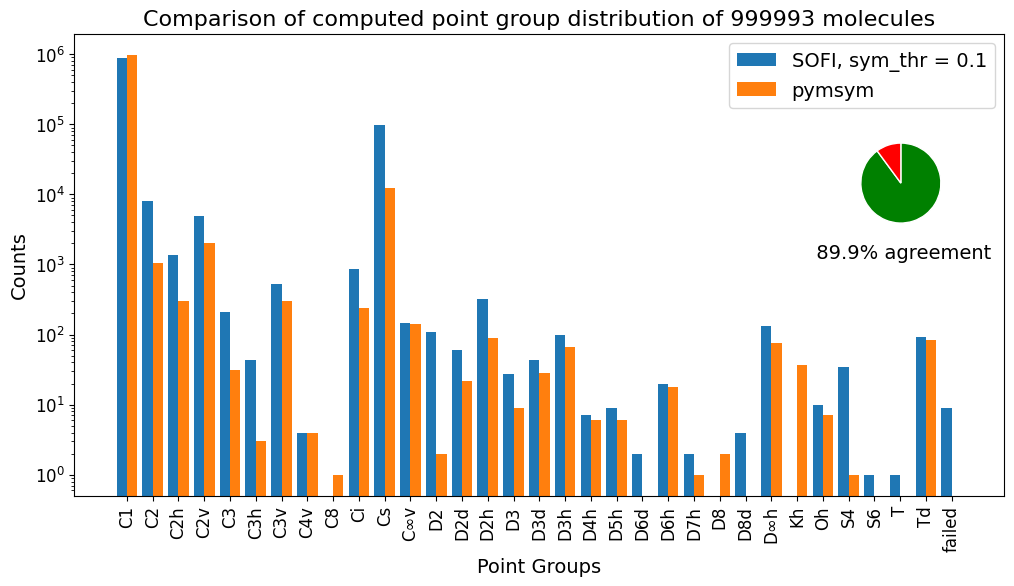

In [114]:
# Frequency counts
counts1 = Counter(sofi_pgs)
counts2 = Counter(pymsym_pgs)

labels = sorted(set(counts1.keys()) | set(counts2.keys()))
vals1 = [counts1.get(l, 0) for l in labels]
vals2 = [counts2.get(l, 0) for l in labels]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, vals1, width, label=f'SOFI, sym_thr = {sym_thr}')
ax.bar(x + width/2, vals2, width, label='pymsym')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_yscale("log")
ax.set_ylabel("Counts", fontsize=14)
ax.set_xlabel("Point Groups", fontsize=14)
ax.set_title(f"Comparison of computed point group distribution of {n_samples} molecules", fontsize=16)
ax.legend(fontsize=14)

# ---------- Small Pie Chart ----------
numer = positional_overlap
denom = len(sofi_pgs)
sizes = [numer, denom - numer]
colors = ["green", "red"]

# Position: (x0, y0, width, height) in axes fraction (0 to 1)
# x0, y0 = bottom-left corner of the inset
ax_inset = inset_axes(ax, width=1, height=1,  # fraction of parent axes
                      bbox_to_anchor=(0.8, 0.65, 0.15, 0.15),  # x0, y0, width, height
                      bbox_transform=ax.transAxes)

ax_inset.pie(
    sizes,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor="white")
)
ax_inset.set_aspect("equal")

# Add label under the pie
ax_inset.text(0.5, -0.2, f" {numer/denom:.1%} agreement", ha='center', va='center', transform=ax_inset.transAxes, fontsize=14)

plt.savefig(f"pgs_comparison_{sym_thr}.png", bbox_inches="tight")
plt.show()

In [1184]:
with open(f"mol3d_data/final/point_groups_million_{mil}_final.json", "r") as f:
    final_pgs = json.load(f)

In [1231]:
sofi_pgs = final_pgs

counts = Counter(sofi_pgs)

# Find values that occur exactly once
unique_values = [val for val, count in counts.items() if count == 3]

# Get the indexes of these unique values
unique_indexes = [i for i, val in enumerate(sofi_pgs) if val in unique_values]

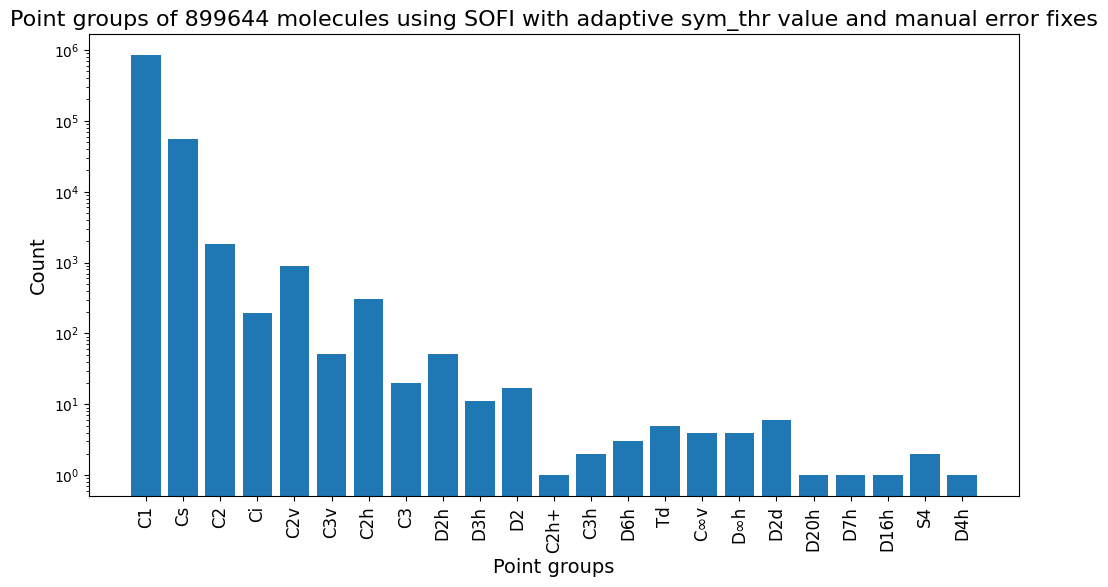

In [1186]:
counts = Counter(sofi_pgs)

# Separate keys and values for plotting
labels = list(counts.keys())
values = list(counts.values())

# Create a bar chart

plt.figure(figsize=(12, 6)) 
plt.bar(labels, values)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Point groups', fontsize=14)
plt.yscale("log")
plt.ylabel('Count', fontsize=14)
plt.title(f'Point groups of {n_samples} molecules using SOFI with adaptive sym_thr value and manual error fixes', fontsize=16)
plt.savefig(f"mol3d_data/plots/million_{mil}_sym_thr_{sym_thr}_with_cleaning.png", bbox_inches='tight', dpi=300)
plt.show()

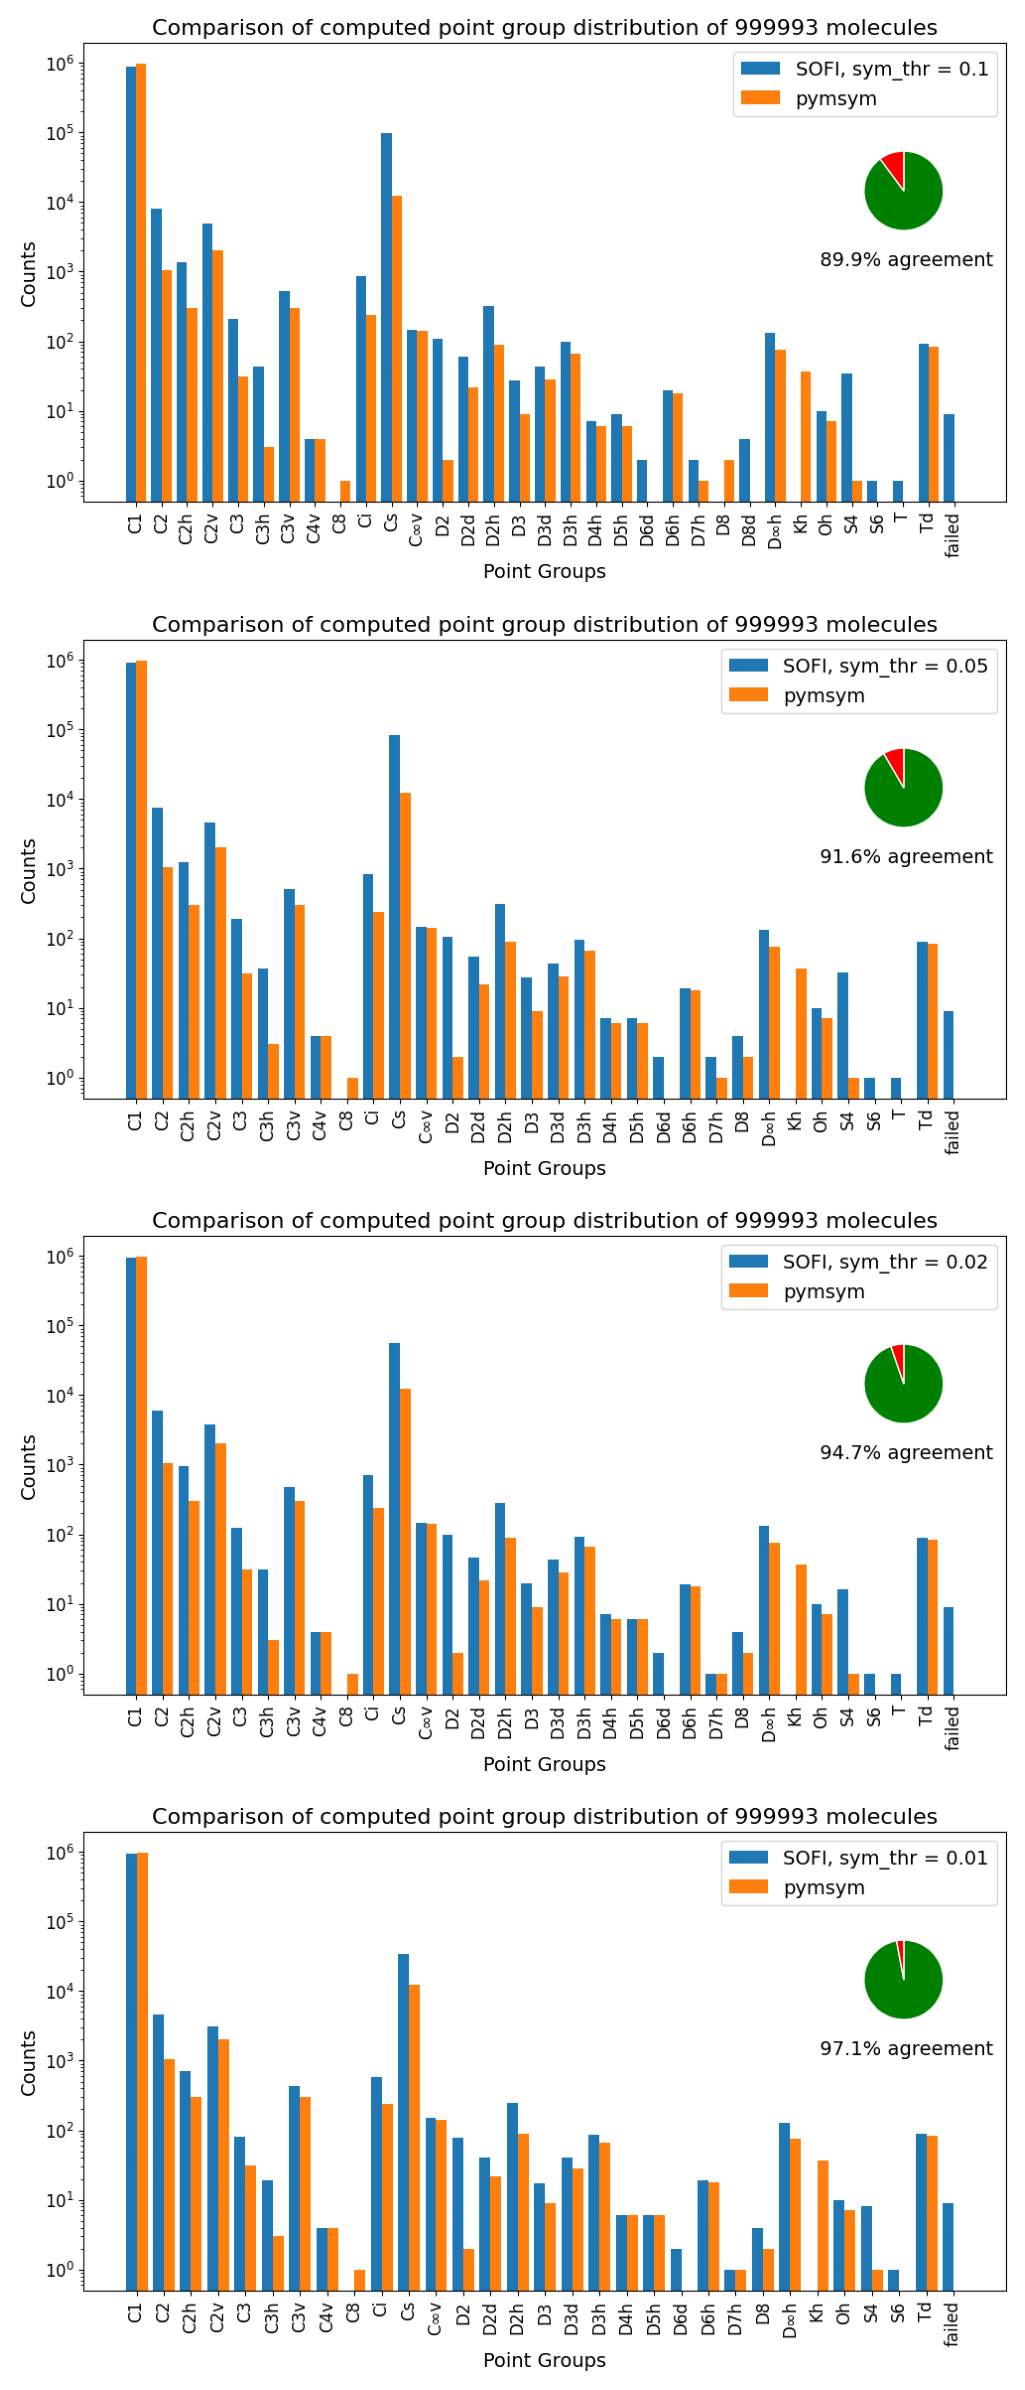

In [116]:
import matplotlib.image as mpimg

# List of existing plot files
files = [
    "mol3d_data/plots/pgs_comparison_0.1.png",
    "mol3d_data/plots/pgs_comparison_0.05.png",
    "mol3d_data/plots/pgs_comparison_0.02.png",
    "mol3d_data/plots/pgs_comparison_0.01.png",
]

fig, axs = plt.subplots(4, 1, figsize=(12, 24))

axs = axs.flatten()

for i, (ax, file) in enumerate(zip(axs, files)):
    img = mpimg.imread(file)   # Load the saved plot
    ax.imshow(img)
    #ax.set_title(file)
    ax.axis("off")  # Hide axis ticks

plt.tight_layout()
plt.savefig("combined_plots.pdf", bbox_inches="tight")
plt.show()